<a href="https://colab.research.google.com/github/Sid2601/AutoEncoders/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras import layers

encoding_dim = 10 #size of encoded representation

input_img = keras.Input(shape=(784,)) #this is our input img

encoded = layers.Dense(encoding_dim, activation='relu')(input_img) #encoded is the encoded representation of the input

decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded) #this model maps input to its reconstruction

encoder = keras.Model(input_img, encoded) # this model maps an input to its encoded representation

encoded_input = keras.Input(shape=(encoding_dim,)) # this is our encoded (32-dim) input

decoder_layer = autoencoder.layers[-1] #retrieve the last layer of the autoencoder model

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [2]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [3]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 5ms/step - loss: 0.3253 - val_loss: 0.2383
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2191 - val_loss: 0.2021
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1923 - val_loss: 0.1819
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1779 - val_loss: 0.1727
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1715 - val_loss: 0.1684
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1681 - val_loss: 0.1655
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1657 - val_loss: 0.1634
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1639 - val_loss: 0.1617
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1623 - val_loss: 0.1603
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1610 - val_loss: 0.1591

In [6]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

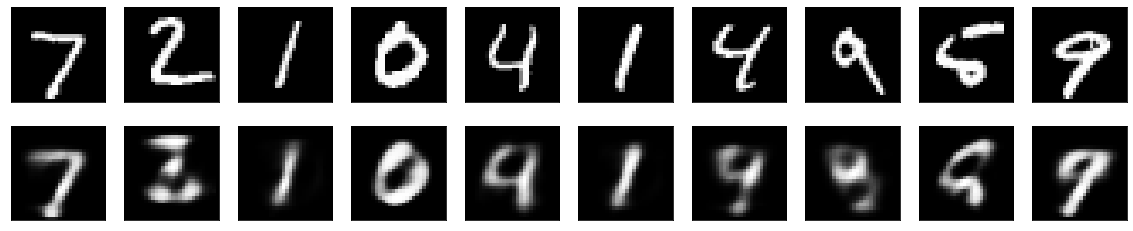

In [7]:
import matplotlib.pyplot as plt


n =10 #no. of digits to display
plt.figure(figsize=(20,4))
for i in range(n):
  #display original digits
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #display reconstructed imgs
  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()